<h1>Pyber Analysis</h1>
<img src="Ride.png" align="left" width=55% height=55%>

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<h3><i>Trends</i></h3>
***
<ul>
<li><b><u>Overall Revenue</b></u>.  Over two-thirds of Pyber's revenue is generated from Urban Cities.</li>  <br>
<li><b><u>Rides to Drivers Ratio</b></u>.   Some cities with high volumes of rides have a disporportionate number of drivers.<ul style="list-style-type:square"> <u>Recommendation</u>  Explore for further analysis.  <i>Is Pyber losing revenue because there are not enough drivers?  If there are too many drivers, and a low supply of rides relative to number of drivers..how is that affecting morale?  Are Pyber's employee compensation and rewards strategies properly aligned?</i></ul> </li><br>
<li><b><u>Relationship between average fares, revenue, and city type.</b></u>  Rural Areas have the average highest fares however generate the lowest revenue.  Similarly Urban Cities have the lowest average fares yet generate the  most revenue.</li>
</ul>


In [1]:
#import dependencies
import pandas as pd
# Matplotlib for additional customization
from matplotlib import pyplot as plt
# Seaborn for plotting and styling
import seaborn as sns

#import data
city_data_raw = "city_data.csv"
city_data  = pd.read_csv(city_data_raw)
ride_data_raw = "ride_data.csv"
ride_data = pd.read_csv(ride_data_raw)

<h3>Average Fares, Total Rides, and Total Drivers by City</h3>

In [2]:
#create dataframes groupedby fare mean and ridecount
avg_fare = ride_data.groupby(["city"])["fare"].mean()#.map("${:,.2f}".format)
# avg_fare2 = avg_fare.map("${:,.2f}".format)

avg_fare = pd.DataFrame(avg_fare).rename(columns={"fare": "Average Fare"}).reset_index()
count_rides = ride_data.groupby(["city"])["ride_id"].count()
count_rides = pd.DataFrame(count_rides).rename(columns={"ride_id": "Total Number of Rides"}).reset_index()
count_drivers = city_data.groupby(["city", "type"])["driver_count"].sum()
count_drivers = pd.DataFrame(count_drivers).rename(columns={"driver_count": "Total Number of Drivers"}).reset_index()

#merge dataframes
mt1 = pd.merge(count_rides, avg_fare,how="inner",on="city")
mt2 = pd.merge(mt1, count_drivers,how="inner",on=
                         "city").rename(columns={"city": "City","type": "City Type"})
#resort
mt3=mt2[["City", "Average Fare", "Total Number of Rides",  "Total Number of Drivers", "City Type"]]

mt3['Average Fare']=mt3['Average Fare'].map("${:,.2f}".format)

mt3.head()

,City,Average Fare,Total Number of Rides,Total Number of Drivers,City Type
0,Alvarezhaven,$23.93,31,21,Urban
1,Alyssaberg,$20.61,26,67,Urban
2,Anitamouth,$37.32,9,16,Suburban
3,Antoniomouth,$23.62,22,21,Urban
4,Aprilchester,$21.98,19,49,Urban


<h3>Bubble Plot of Ride Sharing Data</h3>

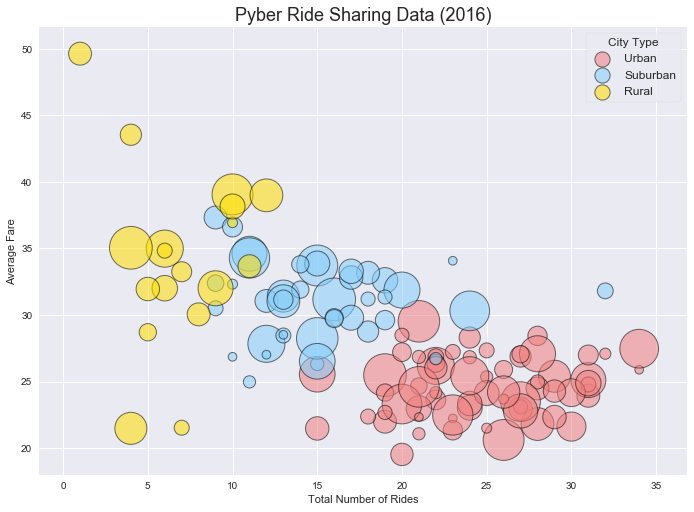

In [3]:
#color palette list

#color list using Seaborn
clrlist = ["#f08080", "#87cefa", "#FFDF00"]
sns.set_palette(clrlist)

#create chart
sns.lmplot(x="Total Number of Rides", y="Average Fare", data= mt2, 
           hue="City Type",  size=7, aspect=1.4 ,
           legend_out = False, legend = True, 
           scatter_kws={"s":mt2["Total Number of Drivers"]*25, 
                        'alpha':.55,'edgecolors':"black", 'linewidth':1},ci=0, fit_reg=False, )
#add legend
plt.legend(loc="upper right", markerscale=.5, title="City Type", fontsize=12, frameon=True)
plt.title("Pyber Ride Sharing Data (2016)", fontsize=18)

plt.show()



<h3>Total Fares by City Type</h3>

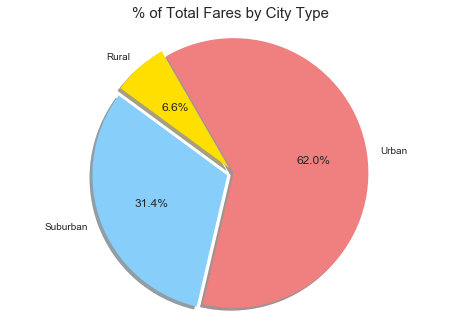

In [4]:
#create dataframe of summed totals
mt5 = pd.merge(city_data, ride_data,how="inner",on="city")
mt5_fare= mt5.groupby(["type"])["fare"].sum()

#create labels and set color theme for all pie charts
cities=["Rural","Suburban","Urban"]
colors = ["#FFDF00","#87cefa","#f08080"]

#create pie chart
explode = (0.05,.05,0)
plt.pie(mt5_fare, labels=cities, explode=explode,labeldistance=1.1,
        autopct="%1.1f%%", colors=colors, shadow=True, startangle=120)
plt.axis("equal")
plt.title("% of Total Fares by City Type", fontsize=15)


plt.show()


<h3>Total Rides by City Type</h3>

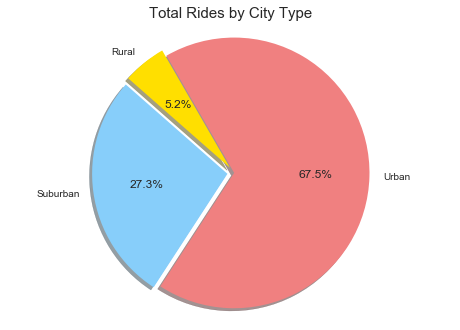

In [5]:
#create dataframe of rides per city type
mt6 = pd.merge(city_data, ride_data,how="inner",on="city")
mt6_fare= mt6.groupby(["type"])["ride_id"].count()

#create pie chart
explode = (0.05,.05,0)
plt.pie(mt6_fare, labels=cities, explode=explode,labeldistance=1.1,
        autopct="%1.1f%%", colors=colors, shadow=True, startangle=120)
plt.axis("equal")
plt.title("Total Rides by City Type", fontsize=15)

plt.show()

<h3>Total Drivers by City Type</h3>

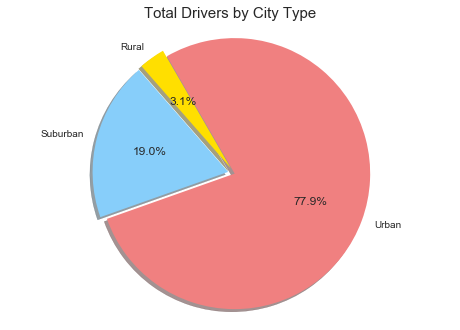

In [6]:
#create dataframe of summed driver totals per city
mt7 = pd.merge(city_data, ride_data,how="inner",on="city")
#drop duplicate city rows to account for that each ride(row) already has a summed driver total
mt7=mt7.drop_duplicates(['city'])

mt7_fare= mt7.groupby(['type'])['driver_count'].sum()

#create pie chart
explode = (0.05,.05,0)
plt.pie(mt7_fare, labels=cities, explode=explode,labeldistance=1.1,
        autopct="%1.1f%%", colors=colors, shadow=True, startangle=120)
plt.axis("equal")
plt.title("Total Drivers by City Type", fontsize=15)

plt.show()
